# Figure 4.18 Continuation diagram

**NOTE**

[Bifurcations.jl](https://github.com/tkf/Bifurcations.jl) does not work (As I am writing this). 
And [BifurcationKit.jl](https://github.com/rveltz/BifurcationKit.jl) might be too complex for this example.

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.gr(lw=2)

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1342
┌ Warning: Module DiffEqNoiseProcess with build ID 1022363659366318 is missing from the cache.
│ This may mean DiffEqNoiseProcess [77a26b50-5914-5dd7-bc55-306e6241c503] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: Module DiffEqNoiseProcess with build ID 1022363659366318 is missing from the cache.
│ This may mean DiffEqNoiseProcess [77a26b50-5914-5dd7-bc55-306e6241c503] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: Module StochasticDiffEq with build ID 1022380658063041 is missing from the cache.
│ This may mean StochasticDiffEq [789caeaf-c7a9-5a7d-9973-96adeb23e2a0] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: Module DiffEqJump with build ID 1022380966635078 is missing from the cache.
│ This may mean

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
@variables t A(t) B(t)
@parameters k_1, k_2, k_3, k_4, k_5, n

D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
eqs = [ D(A) ~ k_1 * hill(1, B, n) - (k_5 + k_3) * A,
        D(B) ~ k_2 + k_5 * A - k_4 * B]

@named sys = ODESystem(eqs, t, [A, B], [k_1, k_2, k_3, k_4, k_5, n])

Model sys with 2 equations
States (2):
  A(t)
  B(t)
Parameters (6):
  k_1
  k_2
  k_3
  k_4
  k_5
  n

In [5]:
params = Dict(k_1 => 20.0, k_2 => 5.0, k_3 => 5.0, k_4 => 5.0, k_5 => 2.0, n => 4)
u0 = [A=>0.0, B=>0.0]

2-element Vector{Pair{Num, Float64}}:
 A(t) => 0.0
 B(t) => 0.0

In [6]:
# Could also use ensemble analysis: https://diffeq.sciml.ai/stable/features/ensemble/
a = map(LinRange(0.0, 1000.0, 50)) do k1
    p = copy(params)
    p[k_1] = k1
	prob = SteadyStateProblem(sys, u0, p)
	sol = solve(prob, DynamicSS(Rodas5()))
	sol[1]
end

50-element Vector{Float64}:
 0.0
 0.7535911916030981
 1.1001047707160903
 1.336332738587099
 1.5188534281749377
 1.6690616788185026
 1.7974922922965966
 1.9101562980532107
 2.0108286081629876
 2.102042173747447
 2.1855863341925748
 2.262774357671374
 2.334599259600828
 ⋮
 3.418394419562234
 3.445880602320876
 3.472810877319742
 3.499209986440656
 3.525100957923993
 3.5505052977713043
 3.5754431432317624
 3.599934034218457
 3.623994424418322
 3.647641154904131
 3.67089101189091
 3.6937572893110944

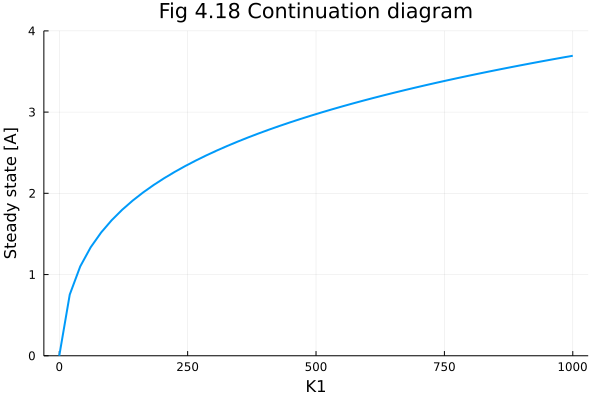

In [7]:
plot(LinRange(0.0, 1000.0, 50), a, title = "Fig 4.18 Continuation diagram", xlabel = "K1" , ylabel= "Steady state [A]", leg=nothing, ylim=(0.0, 4.0))